<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Визуализация-анализа" data-toc-modified-id="Визуализация-анализа-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация анализа</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Постройте-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Постройте-модель-прогнозирования-оттока-клиентов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Постройте модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающую-и-валидационную-выборку" data-toc-modified-id="Разделение-данных-на-обучающую-и-валидационную-выборку-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных на обучающую и валидационную выборку</a></span></li><li><span><a href="#Обучение-модели-&quot;логистической-регрессией&quot;-и-&quot;случайным-лесом&quot;." data-toc-modified-id="Обучение-модели-&quot;логистической-регрессией&quot;-и-&quot;случайным-лесом&quot;.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели "логистической регрессией" и "случайным лесом".</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризацию-клиентов" data-toc-modified-id="Кластеризацию-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кластеризацию клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных,-визуализация-дендрограммой" data-toc-modified-id="Стандартизация-данных,-визуализация-дендрограммой-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Стандартизация данных, визуализация дендрограммой</a></span></li><li><span><a href="#Обучение-модели-кластеризации-и-прогноз-кластеров-клиентов" data-toc-modified-id="Обучение-модели-кластеризации-и-прогноз-кластеров-клиентов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели кластеризации и прогноз кластеров клиентов</a></span></li><li><span><a href="#Визуализация-распределения-признаков-для-кластеров" data-toc-modified-id="Визуализация-распределения-признаков-для-кластеров-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Визуализация распределения признаков для кластеров</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

# Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

**Цель:**
* Провести анализ и подготовить план действий по удержанию клиентов.

**Задачи:**

1. Срогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. Проанализировать основные признаки, наиболее сильно влияющие на отток;
4. Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

	1) выделить целевые группы клиентов;
    
	2) предложить меры по снижению оттока;
    
	3) определить другие особенности взаимодействия с клиентами.


# Импорт библиотек, загрузка данных

In [1]:
#импортируем библиотеки и параметры
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, f1_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#загрузим данные в переменные
try:
    df = pd.read_csv('../12 project/gym_churn.csv')
except: 
    df = pd.read_csv('/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)

In [3]:
df.head() #выведем 5 строк датасета

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


Из описания к данным, таблица `gym_churn` имеет столбцы, которые содержатследующую информацию:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;
* `Churn` — факт оттока в текущем месяце.

Создадим функцию для быстрого анализа стоблцов датафрейма на основные параметры (пропуски, типы и количество данных и т.д.)

In [4]:
#функцие будем передавать датасет, в цикле будем перебирать столбцы
def dataset_info(dataset):
    count = 0
    dataset.columns = dataset.columns.str.lower().str.replace(' ','_') #тут приведем название столбцов к snake_case
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')                                 
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитаем количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество полных строк-дубликатов

In [5]:
#передадим функцие датасет
dataset_info(df)

Название столбца:      gender
Длина столбца:         4000
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[1 0]
----------------
Название столбца:      near_location
Длина столбца:         4000
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[1 0]
----------------
Название столбца:      partner
Длина столбца:         4000
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[1 0]
----------------
Название столбца:      promo_friends
Длина столбца:         4000
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[1 0]
----------------
Название столбца:      phone
Длина столбца:         4000
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[0 1]
----------------
Название столбца:      contract_period
Длина столбца:         4000
Количество пропусков:  0
Тип данных в столбце:  int64
Пример значений:      
[ 6 12  1]
----------------
Название столбца:      g

Всего в датасете 4000 строк (полных дубликатов строк не имеется) и 14 столбцов (их наименование привели к lower_case), пропусков ни в одном столбце не имеется. Лишь в `month_to_end_contract` уточним дополнительно тип данных после првоерки данных.

In [6]:
#запросим количество уникальных значений в столбце
df['month_to_end_contract'].value_counts()

1.00     2207
6.00      645
12.00     524
11.00     181
5.00      130
10.00      82
9.00       73
4.00       58
8.00       38
7.00       25
3.00       23
2.00       14
Name: month_to_end_contract, dtype: int64

In [7]:
#преобразуем тип данных float64 в int64
df['month_to_end_contract']=df['month_to_end_contract'].astype('int64')

In [8]:
#проверим результат
df['month_to_end_contract'].value_counts()

1     2207
6      645
12     524
11     181
5      130
10      82
9       73
4       58
8       38
7       25
3       23
2       14
Name: month_to_end_contract, dtype: int64

С помощью `describe()` изучим средние значения и стандартные отклонения

In [9]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


Мы можем сделать следующие выводы:
* **Пол** - женщин и мужчин почти поровну;
* **Проживание/работа рядом** - 85% посетителей живут или работают рядом с фитнес-центром;
* **Компания-парнтер** - почти половину посетителей составляют сотрудники компаний-партнеров;
* **"Приведи друга"** - 31% процент посетителей пришли в клуб в рамках этой акции;
* **Телефон** - 90% посететилей оставляют номер телефона;
* **Период абонемента** - показатель больше тяготеет к периоду в 6 месяцев;
* **Посещение групповых занятий** - 41% посететилей посещают групповые занятия;
* **Возраст** - средний: 29 лет, минимальный: 18, максимальный: 41;
* **Выручка от дом услуг** - средняя цена на посетитиеля составляет 146,94 ед;
* **Кол-во месяцев до конца абонемента** - 4,32 месяца;
* **Время с первого обращения** - 3,72 месяца;
* **Частота посещений в неделю** - 1,88 раза в неделю;
* **Частота посещений в неделю (пред месяц)** - 1,77 раза в неделю (меньше чем в текущем месяце);
* **Факт оттока в текущем месяце** - 27% посетителей перестали посещать клуб.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [10]:
leave_or_not = df.groupby('churn').mean().T.reset_index()
leave_or_not.columns = ['param','stay', 'leave']
leave_or_not

,param,stay,leave
0,gender,0.51,0.51
1,near_location,0.87,0.77
2,partner,0.53,0.36
3,promo_friends,0.35,0.18
4,phone,0.90,0.90
5,contract_period,5.75,1.73
6,group_visits,0.46,0.27
7,age,29.98,26.99
8,avg_additional_charges_total,158.45,115.08
9,month_to_end_contract,5.28,1.66


Посетители, которые остались в клубе, как правило:
* живут или работают рядом с клубом;
* сотрудники каомпании-партнера;
* пришли по акции "Приведи друга";
* срок абонемента больше тяготеет к полугоду;
* больше ходят на групповые занятия;
* средний возраст таких посетителей больше;
* больше тратят на дополнительные услуги;
* время до конца абонемента больше;
* больше время с первого посещения клуба;
* за текущий и предыдущий месяц в среднем совершают по 2 посещения в неделю.

### Визуализация анализа

Построим столбчатые гистограммы для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

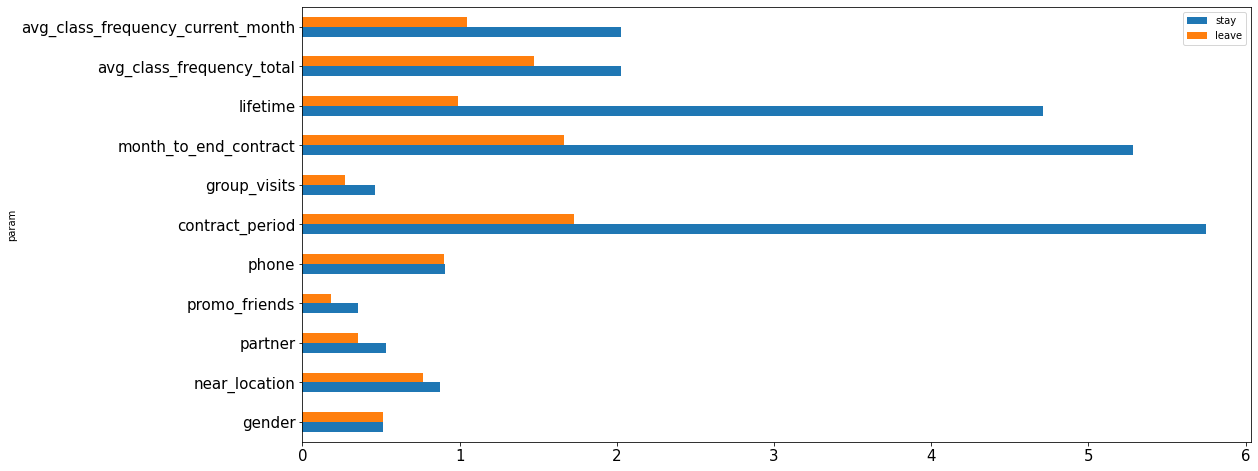

In [11]:
#построим горизонтальную гистрограмму
leave_or_not.drop([7,8]).plot(kind='barh', x='param', figsize=(17, 8), fontsize=15);

Построим гистограммы распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [12]:
#создадим функцию для визуализации распредления признаков
def get_hist(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols:
        plt.figure(figsize=(16, 5))
        plt.title(f'Распределение признака в разрезе ушел/остался (признак - {c})', fontsize = 20)
        sns.set_palette("tab10")
        #plt.title('Распределение признаков, для тех, кто ушел и кто остался', fontsize = 20) plt.title(f'Признак - {column}')
        for cl in x[group_col].unique():
            sns.distplot(x_new[x_new[group_col]==cl][c], 
                         label='{} = {}'.format(group_col, str(cl)), bins = 10)
            plt.legend(['stay','leave'])
        plt.show()

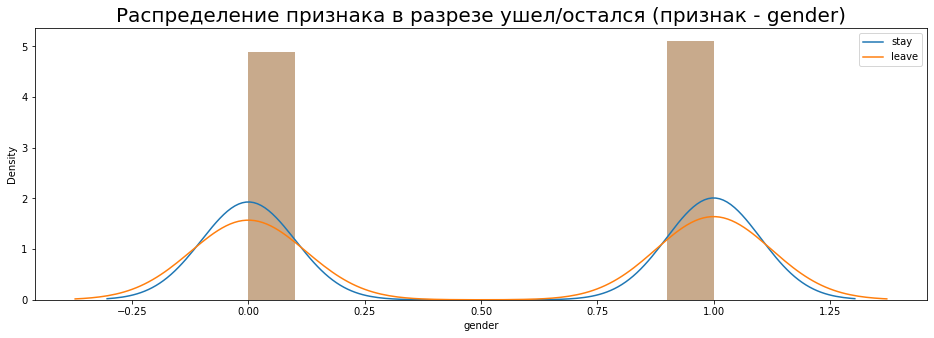

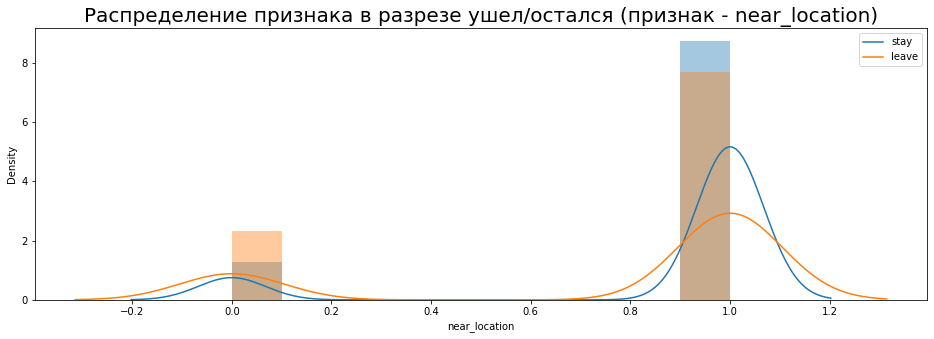

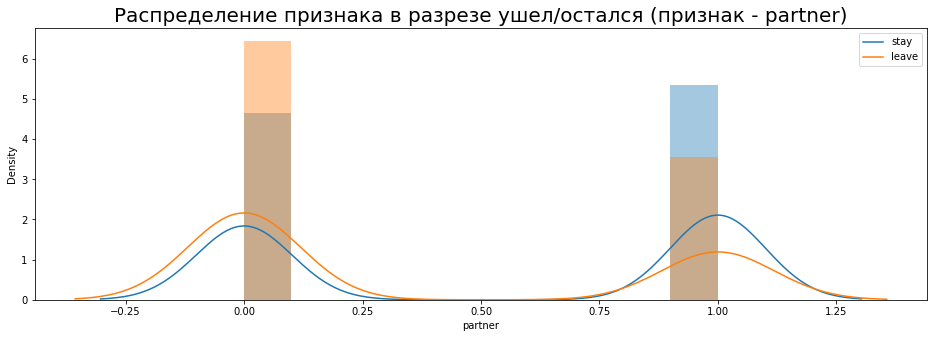

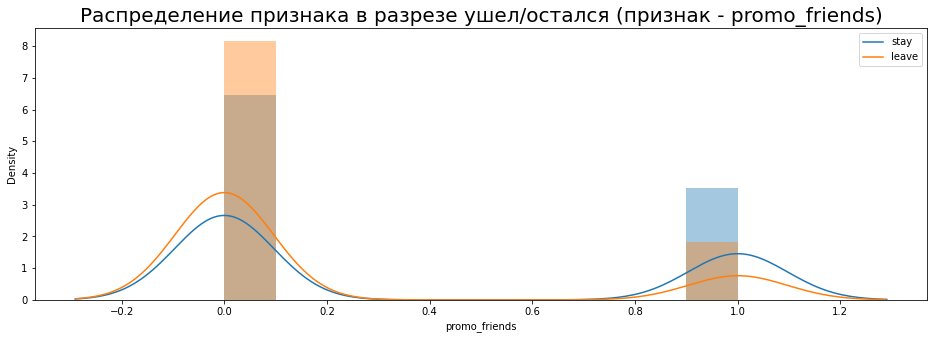

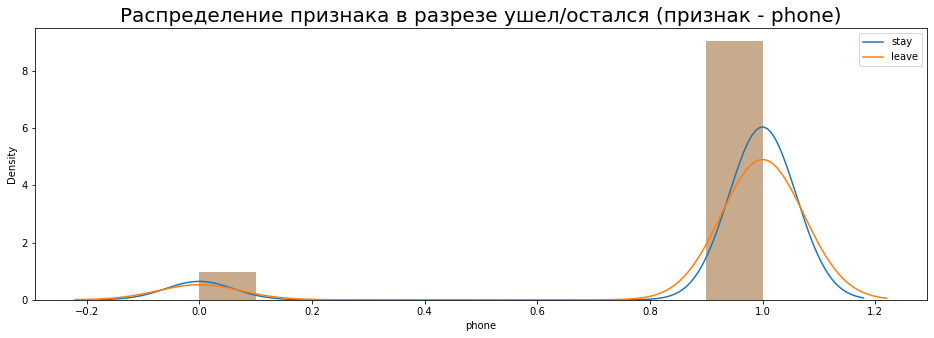

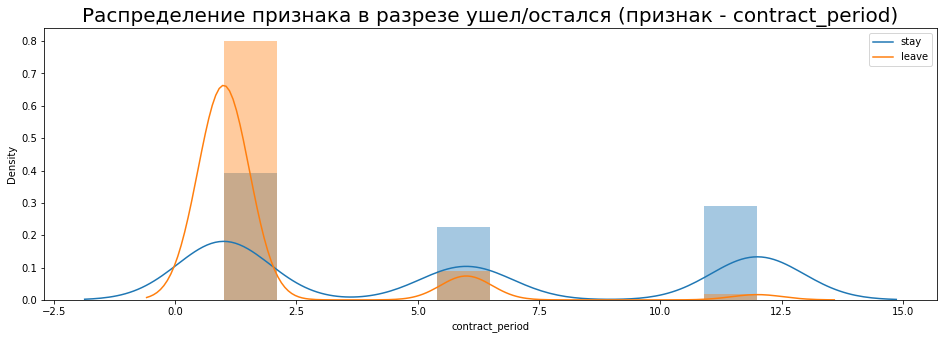

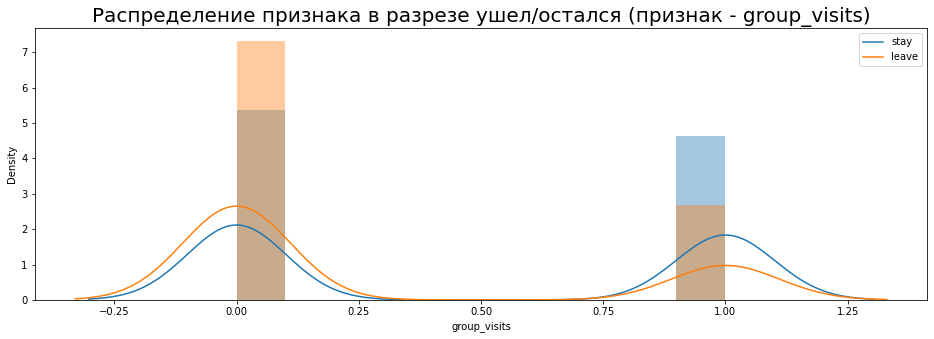

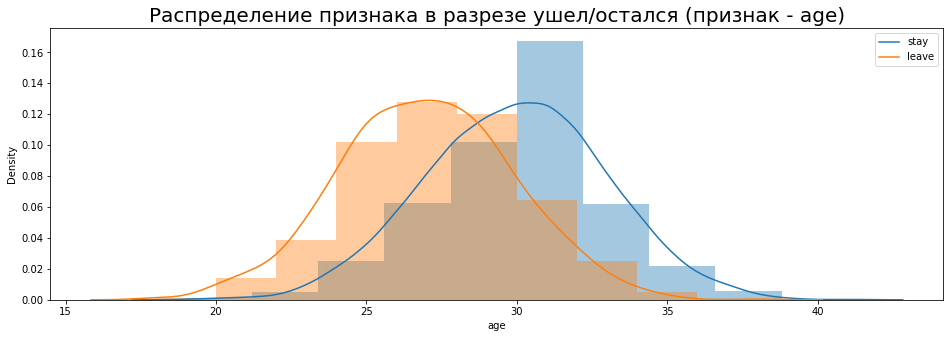

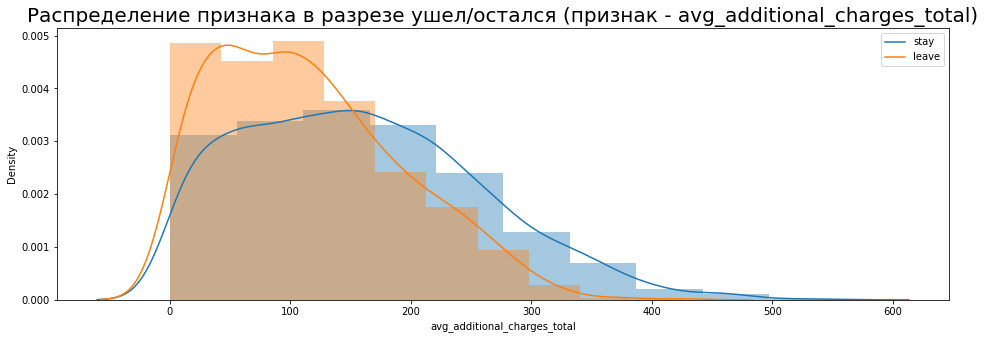

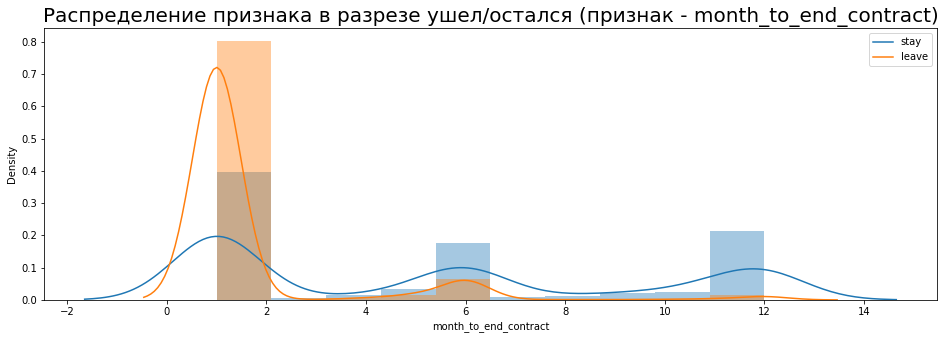

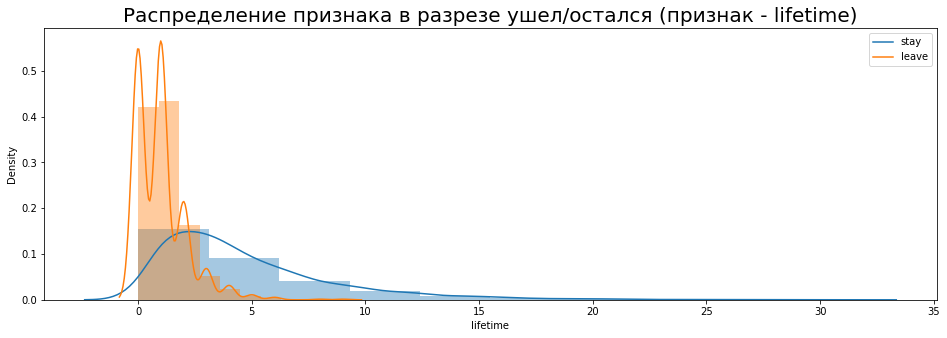

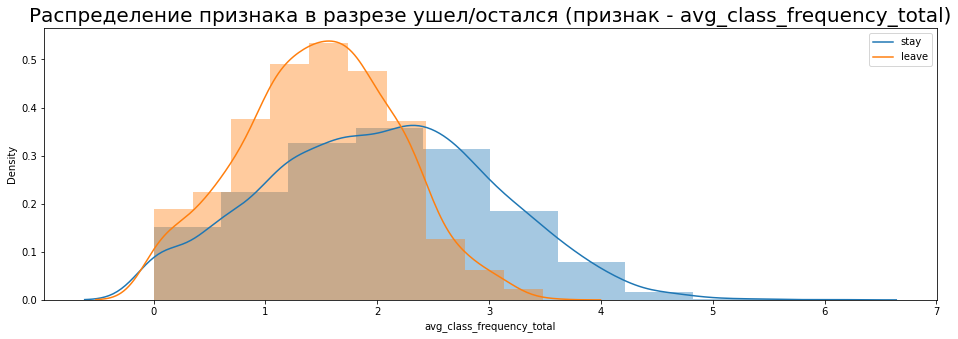

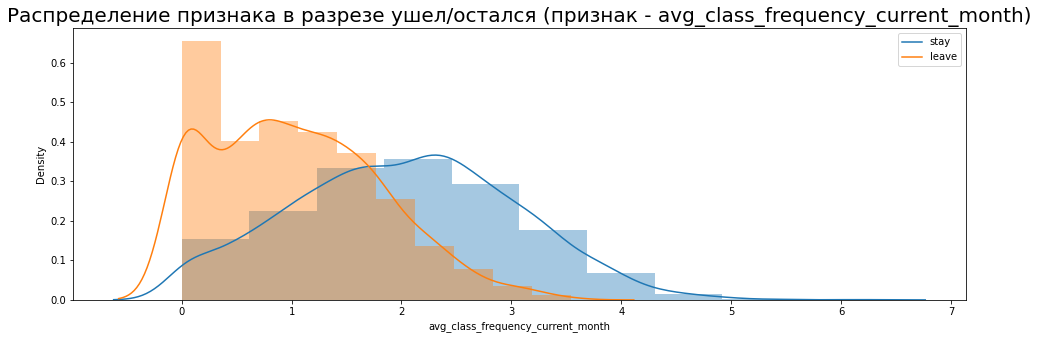

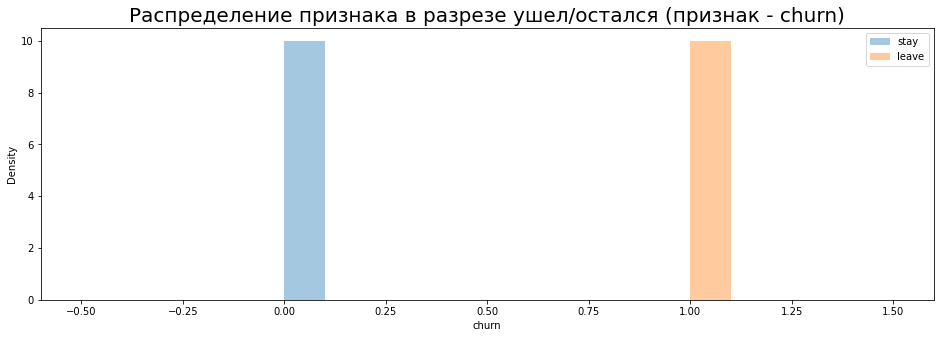

In [13]:
#передадим функцие необходимые параметры
get_hist(df, 'churn', df.columns)

Из визуализации, можно сделать следующие выводы:
* `gender` — какой-либо закономерности не прослеживается;
* `near_Location` — как правило остаются посетители, которые рядом живут или работают;
* `partner` — чаще в отток попадают посетители НЕ компании-партнера, они чаще остаются;
* `promo_friends` — много посетителей покидают клуб не участвуя в акции, также участников акции больше в ушедших, нежели в оставшихся;
* `phone` — какой-либо закономерности не прослеживается;
* `age` — чаще уходят молодые люди до 27, чаще остаются - 27 и старше ;
* `lifetime` — это время закономерно меньше у посетителей попавших в оттток;
* `contract_period` — чаще всего уходят люди, купившыие абонемент на 1 месяц;
* `month_to_end_contract` — тут видно, что чаще уходят люди, которые купили абонемент на 1 месяц, реже - купившие на год;
* `group_visits` — больше уходят посетители, которые не посещали групповые занятия, остаются, которые посещали;
* `avg_class_frequency_total` — ушедшие посетители ходили не так часто в клуб (до 2 раз), оставшиеся - до 3;
* `avg_class_frequency_current_month` — у оставшихся гарфик не изменился, а у ушедших тяготеет к началу, т.е. частота заметно ниже;
* `avg_additional_charges_total` — посетители, которые ушли, как правило тратили до 150 у.е., которые остались - до 220 у.е.;
* `churn` — какой-либо закономерности не прослеживается.

Теперь же, построим матрицу корреляции признаков, чтобы выяснить какие признаки напрямую зависят, а какие - нет.

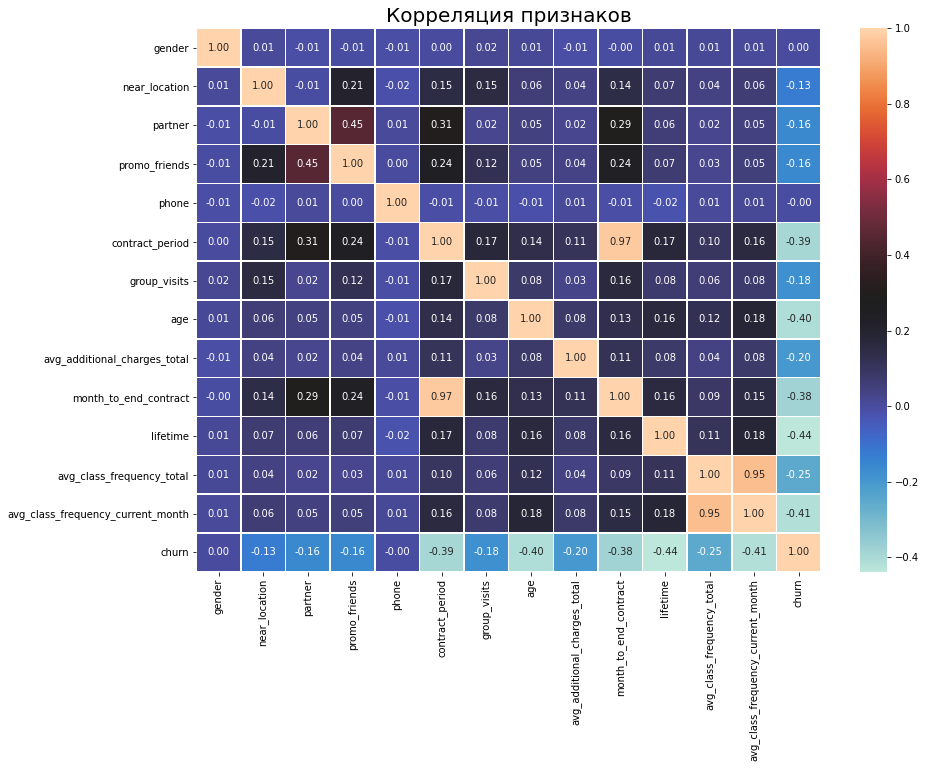

In [14]:
#визуализируем матрицу корреляции признаков
corr = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot = True, fmt = '0.2f', linewidths=.5, cmap="icefire")
plt.title('Корреляция признаков', fontsize = 20)
plt.show()

Из визуализации, видно, что:
* параметры `month_to_end_contract` и `contract_period`, `avg_class_frequency_current_month` и `avg_class_frequency_total` имеют сильную корреляцию (т.к. имеют прямую зависить друг от друга);
* параметры `partner`, `promo_friends`, `contract_period` и `near_location` имеют влияние друг на друга, из этого можно сделать вывод, что близкое расположение клуба, наличие друзей для позода в клуб положительно влияют на срок действия абонемента (он становится больше) и соответственно падает уровень оттока.

Следовало бы удалить сильно коррелирующиеся признаки. Однако, исходя из того, что мы анализируем вероятность оттока именно на основании последнего месяца и показателей частоты посещения (у нас они хоть и близки, но обладаются разными  значениями), мы воздержимся от удаления.

### Вывод

Проведя анализ, можем сформировать следующие итоги:
* **Пол** - женщин и мужчин почти поровну, какой-либо зависимости от других факторов нет, как и вляиния на оттток;
* **Проживание/работа рядом** - 85% посетителей живут или работают рядом с фитнес-центром, при этом этот фактор коррелируется с акцией, компанией-партнером и сроком абонемента. Как правило остаются посетители, которые рядом живут или работают;
* **Компания-партнер** - почти половину посетителей составляют сотрудники компаний-партнеров, данный этот фактор коррелируется с акцией, близким расположением и сроком абонемента. Вкупе с другимит факторами положительно влияет на "прикрепление" клиента;
* **"Приведи друга"** - 31% процент посетителей пришли в клуб в рамках этой акции. У данного фактора есть зависимость от близкого расположения, компании-партнера и длительность абонемента посетителя. Также положительно влияет на "прикрепление" клиента;
* **Телефон** - 90% посететилей оставляют номер телефона, при этом какой-либо заметной зависимости не наблюдается и вляиния на отток;
* **Период абонемента** - показатель больше тяготеет к периоду в 6 месяцев. Зависим от акции, расположения и компании-партнера. У клиентов, которые оформляли абонемент на 1 месяц, существует большая вероятность попасть в отток. Также имеют сильную корреляцию с временем до конца абонемента и сроками посещения.;
* **Посещение групповых занятий** - 41% посететилей посещают групповые занятия, больше уходят посетители, которые не посещали групповые занятия, остаются, которые посещали;;
* **Возраст** - средний: 29 лет, минимальный: 18, максимальный: 41. Чаще попадают в оттток молодые люди до 27, чаще остаются - 27 и старше;
* **Выручка от дом услуг** - средняя цена на посетитиеля составляет 146,94 ед. При этом клиенты, которые ушли, как правило тратили до 150 у.е., которые остались - до 220 у.е.;
* **Кол-во месяцев до конца абонемента** - 4,32 месяца. Имеет сильную корреляцию со сроком абонемента и частотой посещений;
* **Время с первого обращения** - 3,72 месяца;
* **Частота посещений в неделю** - 1,88 раза в неделю. Имеет сильную корреляцию со сроком абонемента и частотой посещений. Ушедшие клиенты ходили не так часто в клуб (до 2 раз), оставшиеся - до 3;;
* **Частота посещений в неделю (пред месяц)** - 1,77 раза в неделю (меньше чем в текущем месяце). Имеет сильную корреляцию со сроком абонемента и частотой посещений ;
* **Факт оттока в текущем месяце** - 27% посетителей перестали посещать клуб.

## Постройте модель прогнозирования оттока клиентов

### Разделение данных на обучающую и валидационную выборку

Перейдем непосоредственно к построению модели прогнозирования отток клиентов. Прежде всего разберемся с целевым показателем, в нашем случае - показатель оттока (`churn`). В `Х` передадим все показатели за исключением оттока, а в `Y` сам отток.

Дополнительно сделаем стратификацию, чтобы целевой показатель равномерно распределился между обучающей и валидационной выборками

In [15]:
#разделим датасет на искомые показатели и поделим их
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Теперь перейдем непосредственно к обучению модели двумя способами

### Обучение модели "логистической регрессией" и "случайным лесом".

Обучать модель будем двумя способами: *логистической регрессией* и *случайным лесом*. Для сравнения эффективности, будем сравнивать по следующим показателям:
* Accuracy - доля правильных ответов;
* Precision - точность;
* Recall - полнота.

In [16]:
#обучим модель логической регрессией
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
probabilities_lr =  model_lr.predict_proba(X_test)[:,1]

In [17]:
print('Модель, обученная логистической регрессией, имеет следующие показатели:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_lr)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_lr)))

Модель, обученная логистической регрессией, имеет следующие показатели:
Accuracy: 0.92
Precision: 0.89
Recall: 0.81


In [18]:
#обучим модель случайным лесом
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test) 
probabilities_rf = model_rf.predict_proba(X_test)[:,1]

In [19]:
print('Модель, обученная случайным лесом, имеет следующие показатели:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_rf)))

Модель, обученная случайным лесом, имеет следующие показатели:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


### Вывод

Две модели показали в целом похожие результаты. 
Так параметры `Accuracy` (доля правильных ответов)  у двух моделей одинаковые. `Precision`(точность) больше у "Логическая регрессия", `Recall` (полнота) больше на 0,02 у модели  "Случайный лес". В целом можно выделить модель "Случайный лес", однако каких-либо значимых разрывов в показателях мы не наблюдаем.

## Кластеризацию клиентов

### Стандартизация данных, визуализация дендрограммой

Выполним стандартизацию и передадим получившуюся стандартизированную таблицу в качестве параметра функции `linkage()`. Чтобы диаграмма получилась показательной, передадим параметру method значение `ward`. В переменной `linked` сохранена таблица «связок» между объектами. Её визуализируем как дендрограмму

In [20]:
#выполним стандартизацию датасета без целевого признака churn
sc = StandardScaler().fit_transform(X)
linked = linkage(sc, method = 'ward')

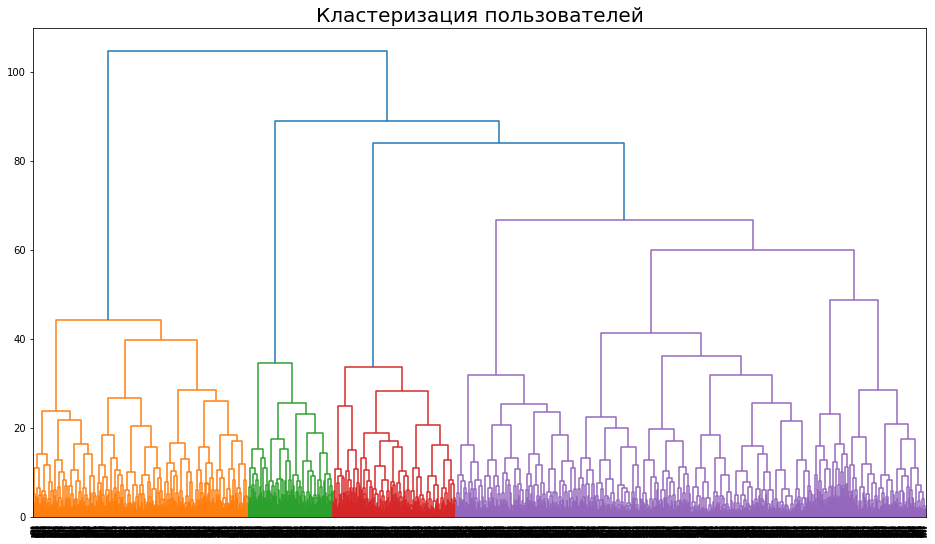

In [21]:
#визуализируем данные дендрограммой
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей', fontsize = 20)
plt.show()

Визуально можно выделить 4-6 кластеров

### Обучение модели кластеризации и прогноз кластеров клиентов

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров примем n=5. Затем добавим полученные значения кластеров в датасет.

In [22]:
km = KMeans(n_clusters=5, random_state=0) #задаём число кластеров, равное 5, и фиксируем значение random_state
labels = km.fit_predict(sc) #применяем алгоритм к данным и формируем вектор кластеров
df['cluster']=labels

Взглянем как распредиллись пользователи по кластерам

In [23]:
#посмотрим количество клиентов в различных кластерах
df['cluster'].value_counts()

3    1262
0    1010
4     838
2     505
1     385
Name: cluster, dtype: int64

Для проверки кластеризации используем метрику силуэта (англ. silhouette score). Метрика силуэта показывает, насколько объект своего кластера похож на свой кластер больше, чем на чужой. На вход передаём нормализованную или стандартизованную матрицу признаков и метки, которые спрогнозировал алгоритм кластеризации, в виде списка. Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация. Проверим это.

In [24]:
#проверим значение признака
silhouette_score(sc, labels)

0.14140953623023353

Кластеризация выполнена неидеально. Теперь рассмотрим средние значения признаков для кластеров.

In [25]:
#рассмотрим признаки в разрезе кластеров
df.groupby('cluster').mean().T.reset_index()

cluster,index,0,1,2,3,4
0,gender,0.50,0.52,0.50,0.49,0.56
1,near_location,0.96,0.86,0.00,1.00,0.98
2,partner,0.78,0.47,0.46,0.35,0.36
3,promo_friends,0.57,0.31,0.08,0.24,0.23
4,phone,1.00,0.00,1.00,1.00,1.00
5,contract_period,10.89,4.79,2.35,1.95,2.67
6,group_visits,0.54,0.43,0.22,0.34,0.47
7,age,29.98,29.30,28.48,28.17,30.13
8,avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
9,month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Рассмотрим самые отличающиеся показатели (среди других) по кластерам.

**Кластер 0:**

<font color="red">высокие показатели:</font>

- компания-партнер;
- акция "Приведи друга";
- период абонемента и как следствие количество месяцев до окончания абонемента;
- групповые занятия;

<font color="green">низкие показатели:</font>
- отток;

**Кластер 1:**

<font color="green">низкие показатели:</font>
- телефон;

**Кластер 2:**

<font color="green">низкие показатели:</font>
- близкое нахождение;
- акция "Приведи друга";
- групповые занятия;

**Кластер 3:**

<font color="red">высокие показатели:</font>
- близкое нахождение;
- отток;

<font color="green">низкие показатели:</font>
- компания-партнер;
- период абонемента и как следствие количество месяцев до окончания абонемента;
- возраст;
- дополнительные траты в клубе;
- количество посещений в неделю и в месяц ;

**Кластер 4:**

<font color="red">высокие показатели:</font>
- возраст;
- дополнительные траты в клубе;
- количество посещений в неделю и в месяц ;

В целом, можно выделить 2 благоприятных кластера для нашего клуба: **№0** и **№4**, наименее - **№3**.

### Визуализация распределения признаков для кластеров

Построим визуальное распределение признаков для кластеров

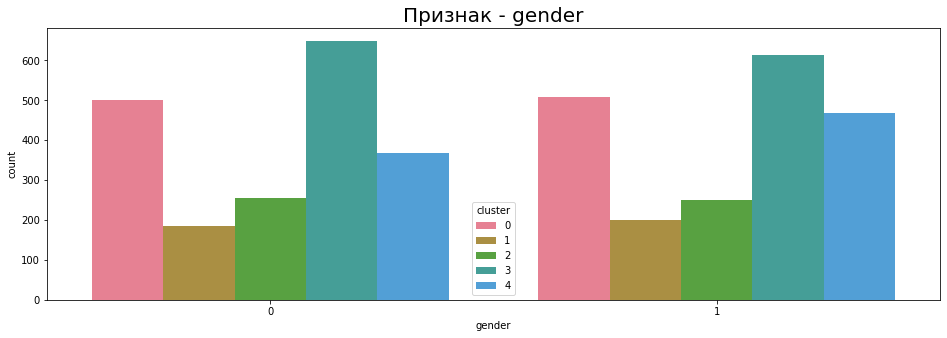

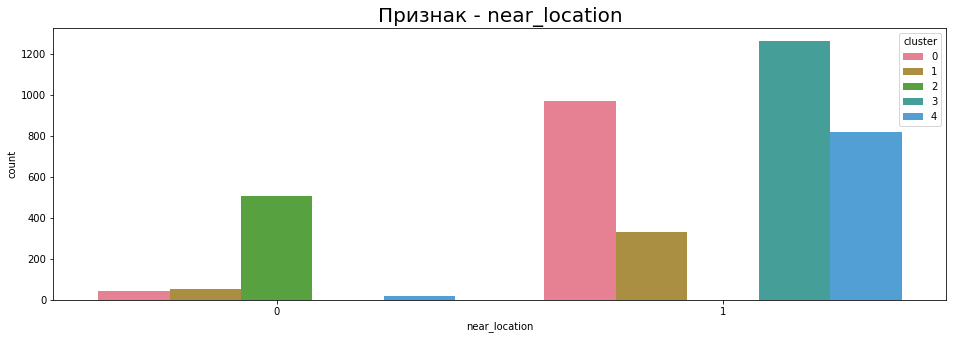

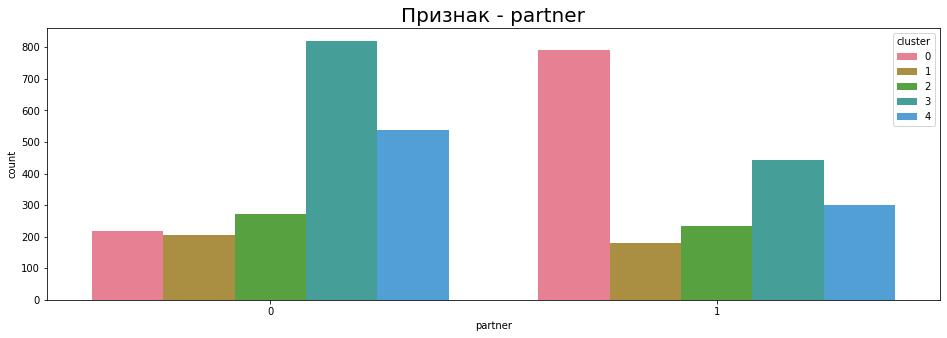

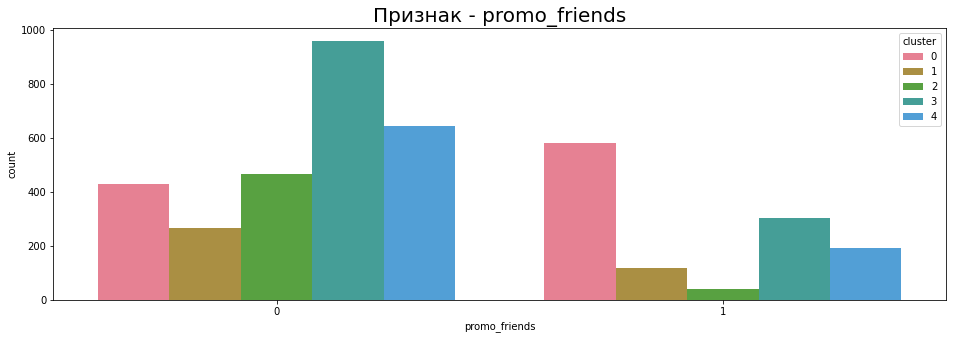

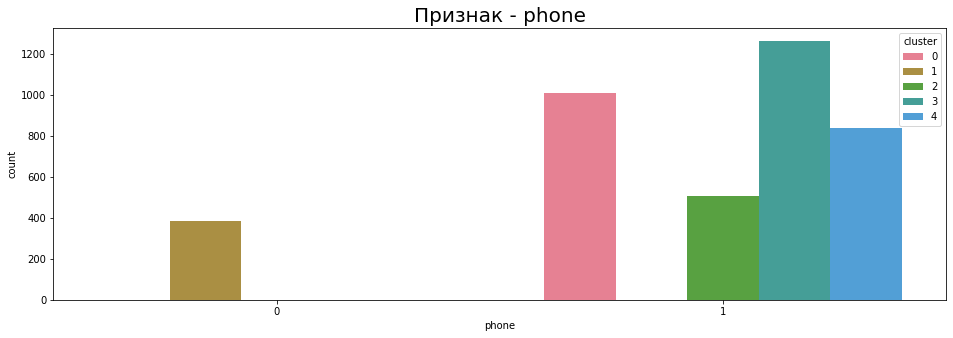

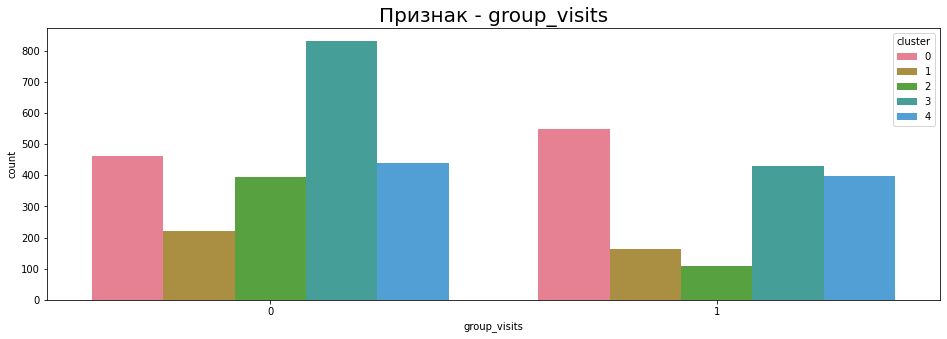

In [26]:
#визуализируем бинарные признаки
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']:
    sns.set_palette("husl")
    plt.figure(figsize=(16, 5))
    plt.title(f'Признак - {column}', fontsize = 20)
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.show()

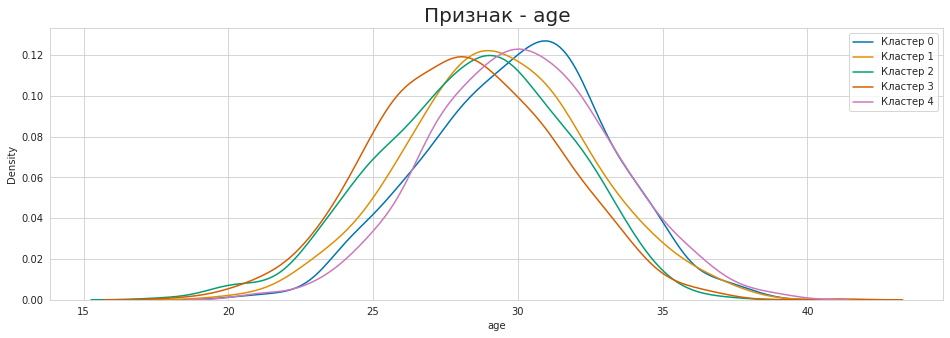

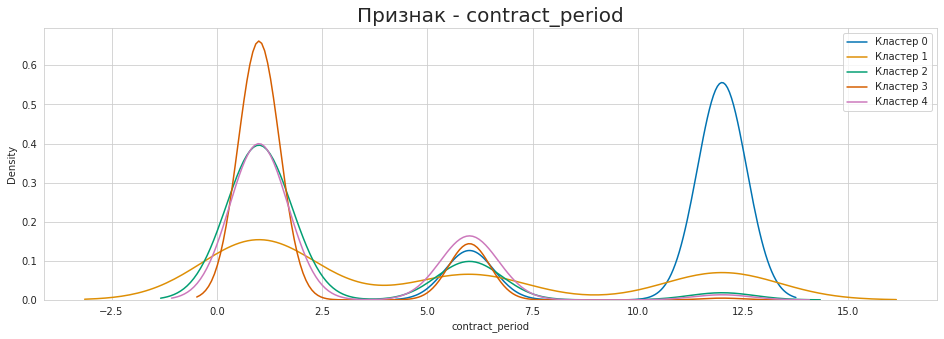

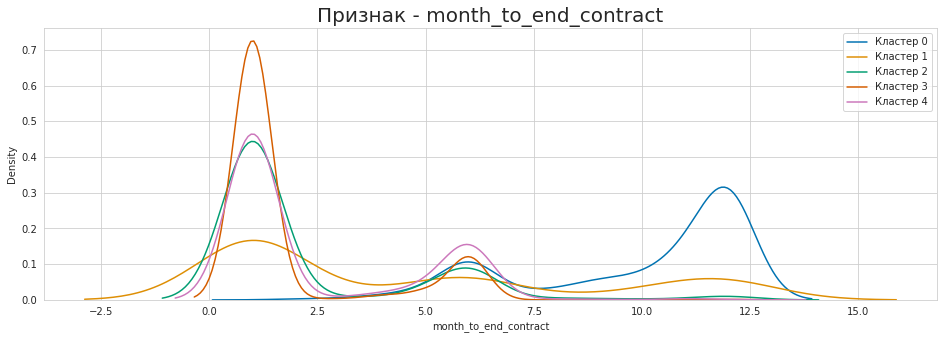

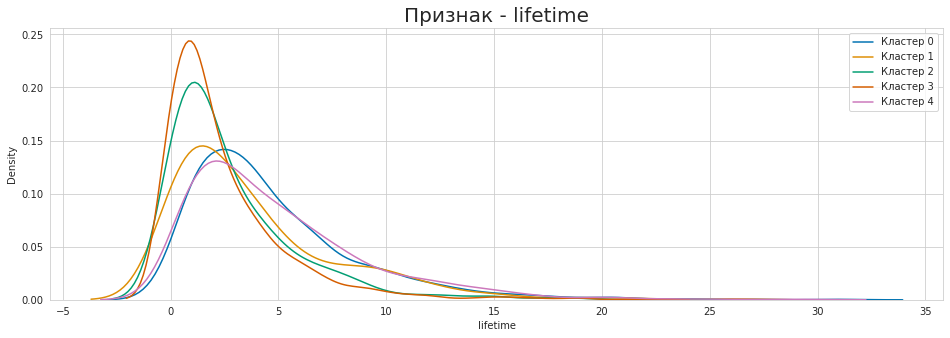

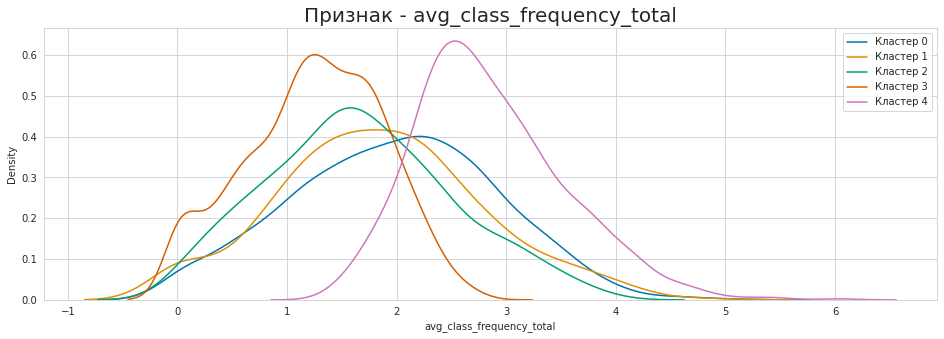

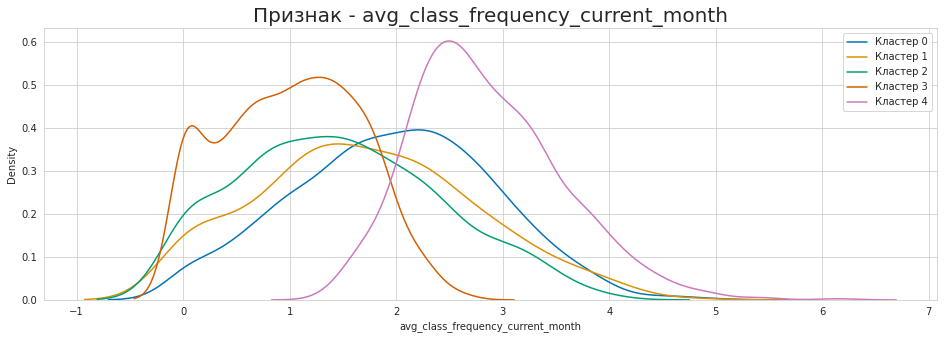

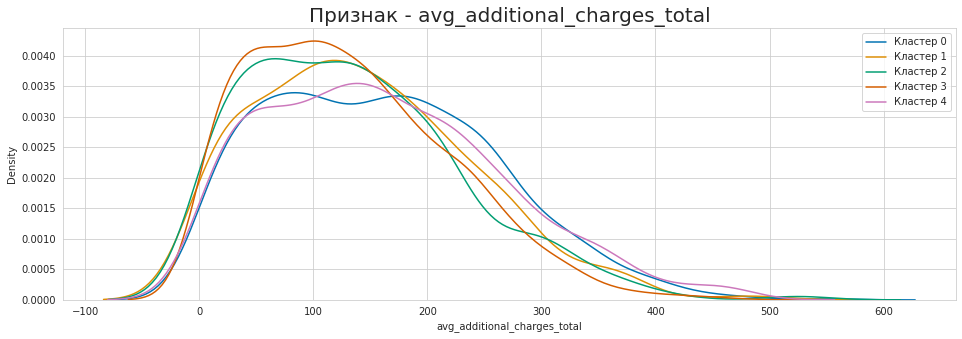

In [27]:
#визуализируем небинарные признаки
for column in ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']:
    plt.figure(figsize=(16, 5))
    sns.set_style('whitegrid')
    sns.set_palette("colorblind")
    plt.title(f'Признак - {column}', fontsize = 20)
    sns.kdeplot(df.query('cluster==0')[column], label = 'Кластер 0')
    sns.kdeplot(df.query('cluster==1')[column], label = 'Кластер 1')
    sns.kdeplot(df.query('cluster==2')[column], label = 'Кластер 2')
    sns.kdeplot(df.query('cluster==3')[column], label = 'Кластер 3')
    sns.kdeplot(df.query('cluster==4')[column], label = 'Кластер 4')
    plt.legend()
    plt.show()

Визулизировав, мы имеем:
* **Пол** - значимых отличий не наблюдается;
* **Проживание/работа рядом** - в оттоке: кластер №2, остальные в удержании (лидирует кластер №3);
* **Компания-партнер** - все кластеры представлены равномерно в двух вариациях. В оттоке: лидер №3, в удержании №0;
* **"Приведи друга"** - аналогичная ситуация как с компанией-партнером;
* **Телефон** - клиенты кластера №1 не оставляют телефон и находятся оттоке;
* **Период абонемента** - кластер №1 берут как правило абонемент сроком на 1 месяц, №4 – полгода, №0 – год;
* **Посещение групповых занятий** - все кластеры представлены в двух вариациях. Лидер в оттоке: №3, в удержании: №1;
* **Возраст** - самые молодые клиенты – кластер №3, старше - №0;
* **Выручка от доп услуг** - меньше платят №1,2, больше - №0;
* **Кол-во месяцев до конца абонемента** - ситуация аналогично периоду абонемента (эти показатели напрямую коррелируются);
* **Время с первого обращения** - наименьшее время - №3, наибольшее - №0,4;
* **Частота посещений в неделю** - наименьшее: №1, наибольшее: №4;
* **Частота посещений в неделю (пред месяц)** - наименьшее: №1, наибольшее: №4.

Теперь посмотрим величину отттока по кластерам, дополнительно визуализируем полученные данные.

In [28]:
#посмотрим средние значения оттока в кластерах
cluster_churn = df.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn').reset_index()
cluster_churn

,cluster,churn
0,0,0.03
1,4,0.07
2,1,0.27
3,2,0.44
4,3,0.51


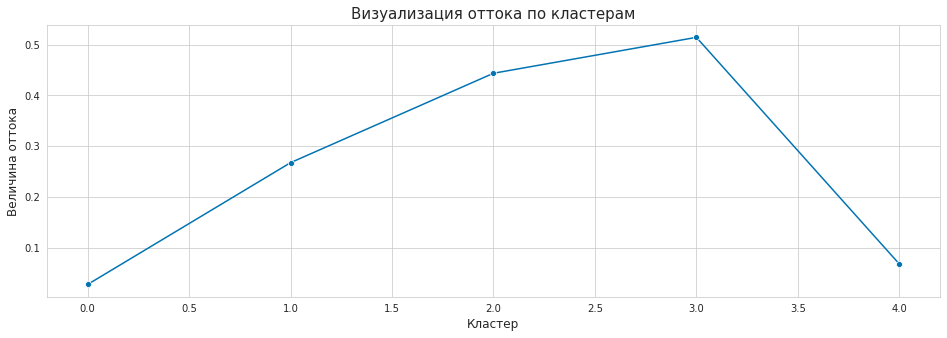

In [29]:
#графически представим отток по кластерам
plt.figure(figsize=(16, 5))
sns.lineplot(data=cluster_churn, x="cluster", y="churn", marker= 'o')
plt.xlabel("Кластер", fontsize= 12)
plt.ylabel("Величина оттока", fontsize= 12)
plt.title("Визуализация оттока по кластерам", fontsize= 15);

Наибольший отток имеем в кластерах **2** (44%) и **3** (51%), наименьший - **0** (3%) и **4** (7%)

### Вывод

Мы выполнили стандартизацию датасета и визуализировали как дендрограмму, и определили количестов кластеров от 4 до 6. Обучив модель кластеризации на основании алгоритма K-Means, мы спрогнозировали 5 кластеров. Но сам процесс кластеризации прошел неидеально (коэффициент 0,14). Рассмотрев подробно кластеры, в разрезе признаков, мы определили, что можно выделить 2 благоприятных кластера для нашего клуба: №0 и №4, наименее - №3 и №2.

## Выводы и рекомендации

### Выводы

**Данные**

Всего в датасете 4000 строк (полных дубликатов строк не имеется) и 14 столбцов (их наименование привели к lower_case), пропусков ни в одном столбце не имеется. Состояние данных очень хорошее.

Первичный анализ данных показал:
* <font color="blue">*Пол*</font> - женщин и мужчин почти поровну, какой-либо зависимости от других факторов нет, как и вляиния на оттток;
* <font color="blue">*Проживание/работа рядом* </font>- 85% посетителей живут или работают рядом с фитнес-центром, при этом этот фактор коррелируется с акцией, компанией-партнером и сроком абонемента. Как правило остаются посетители, которые рядом живут или работают;
* <font color="blue">*Компания-партнер*</font> - почти половину посетителей составляют сотрудники компаний-партнеров, данный этот фактор коррелируется с акцией, близким расположением и сроком абонемента. Вкупе с другимит факторами положительно влияет на "прикрепление" клиента;
* <font color="blue">*Приведи друга* </font>- 31% процент посетителей пришли в клуб в рамках этой акции. У данного фактора есть зависимость от близкого расположения, компании-партнера и длительность абонемента посетителя. Также положительно влияет на "прикрепление" клиента;
* <font color="blue">*Телефон* </font>- 90% посететилей оставляют номер телефона, при этом какой-либо заметной зависимости не наблюдается и вляиния на отток;
* <font color="blue">*Период абонемента*</font> - показатель больше тяготеет к периоду в 6 месяцев. Зависим от акции, расположения и компании-партнера. У клиентов, которые оформляли абонемент на 1 месяц, существует большая вероятность попасть в отток. Также имеют сильную корреляцию с временем до конца абонемента и сроками посещения.;
* <font color="blue">*Посещение групповых занятий*</font> - 41% посететилей посещают групповые занятия, больше уходят посетители, которые не посещали групповые занятия, остаются, которые посещали;;
* <font color="blue">*Возраст*</font> - средний: 29 лет, минимальный: 18, максимальный: 41. Чаще попадают в оттток молодые люди до 27, чаще остаются - 27 и старше;
* <font color="blue">*Выручка от дом услуг* </font>- средняя цена на посетитиеля составляет 146,94 ед. При этом клиенты, которые ушли, как правило тратили до 150 у.е., которые остались - до 220 у.е.;
* <font color="blue">*Кол-во месяцев до конца абонемента* </font>- 4,32 месяца. Имеет сильную корреляцию со сроком абонемента и частотой посещений;
* <font color="blue">*Время с первого обращения* </font>- 3,72 месяца;
* <font color="blue">*Частота посещений в неделю*</font> - 1,88 раза в неделю. Имеет сильную корреляцию со сроком абонемента и частотой посещений. Ушедшие клиенты ходили не так часто в клуб (до 2 раз), оставшиеся - до 3;;
* <font color="blue">*Частота посещений в неделю (пред месяц)* </font>- 1,77 раза в неделю (меньше чем в текущем месяце). Имеет сильную корреляцию со сроком абонемента и частотой посещений ;
* <font color="blue">*Факт оттока в текущем месяце*</font> - 27% посетителей перестали посещать клуб.

**Модели**

Построили модель прогнозирования оттока клиентов с целевым показателем оттока (`churn`). Обучали модель двумя способами: *Логистическая регрессией* и *Случайный лес*. Сравнили модели по показателям `Precision`(точность),`Recall` (полнота) и 
`Accuracy` (доля правильных ответов). 

Две модели показали в целом похожие результаты. 
Так параметры `Accuracy` у двух моделей одинаковые. `Precision` больше у "Логическая регрессия", `Recall` больше на 0,02 у модели  "Случайный лес". В целом можно выделить модель "Случайный лес", однако каких-либо значимых разрывов в показателях мы не наблюдаем..

**Кластеры**

Мы выполнили стандартизацию датасета и визуализировали как дендрограмму, и определили количестов кластеров от 4 до 6. Обучив модель кластеризации на основании алгоритма K-Means, мы спрогнозировали 5 кластеров. Но сам процесс кластеризации прошел неидеально (коэффициент 0,14). 

Сфомируем портерт каждого представителя кластера, в разрезе 7 признаков:

<font color="orange">Кластер 0:</font> 
возраст – за 30, живет или работает рядом, участвует в акции, как правило покупает абонемент на год, посещает групповые занятия, ходит 2-3 раза в неделю в клуб, тратит в клубе около 200 у.е., **не** склонен к оттоку.

<font color="orange">Кластер 1:</font> 
возраст – 25-30, живет или работает рядом,  участвует в акции, как правило покупает абонемент на 1 или 6 месяцев, групповые занятия посещает когда как, ходит 1 раз в неделю в клуб, тратит в клубе от 100 до 120 у.е., скорее не склонен к оттоку.

<font color="orange">Кластер 2:</font>
возраст – 25-30, живет или работает рядом, **не** участвует в акции, как правило покупает абонемент на 1 месяц, **не** посещает групповые занятия, ходит 1-2 раза в неделю в клуб, тратит в клубе от 50 до 100 у.е., склонен к оттоку.

<font color="orange">Кластер 3:</font>
возраст – 25-30, **не** живет или работает рядом, **не** участвует в акции, как правило покупает абонемент на 1 месяц, **не** посещает групповые занятия, ходит 1-2 раза в неделю в клуб, тратит в клубе около 100 у.е., склонен к оттоку.

<font color="orange">Кластер 4:</font>
возраст – в районе 30, живет или работает рядом, как правило участвует в акции, как правило покупает абонемент на полгода или год, групповые занятия посещает когда как, ходит 2-3 раза в неделю в клуб, тратит в клубе около 130 у.е., **не** склонен к оттоку.


Рассмотрев подробно кластеры, в разрезе признаков, мы определили, что можно выделить 2 благоприятных кластера для нашего клуба: №0 и №4, наименее - №3 и №2.

### Рекомендации

Согласно анализу, в текущем месяце у нас ушли 27% клиентов, это совсем плохая тенденция. Значит существует причина, по которой клиентам некомфортно. Это может быть: позиционирование клуба, интерьер (клиенты хотели увидеть современный клуб, а пришли в подвальную качалку), наличие и работоспособность тренажеров, компетентность и доброжелательность персонала, наличие конкурентов поблизости (и выгодных акций у них). В наших условиях необходимо предпринять следующее:

1) выяснить причины оттока у кластеров в зоне риска;

2) стараться больше популярирозвать акцию. Ведь клиент, который привел друга, уже будет не один ходить в клуб, и тем самым существует вероятность, что он задержится;

3) выстроить ценовую политику в отношении абонементов. Например сделать больше периодов (1, 3, 6, 9, 12 месяцев), сделать больше скидку на абонемент, чем выше его период;

4) постараться расширить комплекс услуг клуба, например открыть секцию бокса или открыть бар и предлагать коктейли;

5) постараться завлечь клиентов на групповые занятия (помочь преодолеть психологический барьер);

6) просегментировать клиентов клуба, чтобы предлагать им индивидуальные предложения и предупредить их отток. 